# Berechnung des NDVI aus Sentinel-2-Daten in Python

Diese Aufgabe umfasst die Berechnung des Normalized Difference Vegetation Index (NDVI) aus Sentinel-2-Daten. Der NDVI  dient der Beschreibung des Vegetationszustandes.

Gesunde Vegetation reflektiert sehr wenig elektronmagnetische Strahlung im roten Bereich des sichtbaren Spektralbereichs (Wellenlänge ca. 600 bis 700 nm), jedoch sehr viel im für das menschliche Auge nicht sichtbaren Nahen Infrarot (NIR; Wellenlänge ca. 700 bis 1300 nm). Auf diese Weise kann die Vegetation an der Erdoberfläche aus Satellitendaten abgeleitet werden.

Die Formel lautet: NDVI = (NIR - RED) / (NIR + RED)

Für die Berechnung können die Sentinel-Bänder 4 (RED) und 8A (NIR) herangezogen werden. Zu diesem Zweck werden Sentinel-2-Daten für Jena bereitgestellt. Die Daten wurden am 01.07.2018 aufgenommen.

Die Berechnung soll in der Programmiersprache Python erfolgen.

### Import benötigter Module
Im ersten Schritt werden alle benötigten Python-Module importiert.

Dieser erfüllen in der vorliegenden Aufgabe den folgenden Zweck:

OSGEO/GDAL: Öffnen/Schreiben von GeoTiff-Dateien,<br>
Matplotlib: Darstellung der Daten in diesem Dokument,<br>
Sys: Zugriff auf Systemfunktionen (z.B. Dateisystem),<br>
Numpy: Verrechnung von mehrdimensionalen Arrays

In [19]:
from osgeo import gdal
from osgeo.gdalconst import *
from matplotlib import pyplot as plt
import sys
import numpy as np

### Öffnen der benötigten Bänder
Mit dem "gdal.Open"-Befehl können Bänder geöffnet und einer Variable zugeordnet werden. Mit dem Befehl "GetRasterBand" wird das erste (und einzige) Band einer jeden Datei ausgelesen. Anschließend werden die Daten in Form eines zweidimensionalen Arrays in eine neue Variable eingelesen. 

In [4]:
band1 = gdal.Open('/home/fbrandt/Schreibtisch/S2A_L2A_20180701_Jena/B8A_20m.tif') # NIR-Bild laden
band2 = gdal.Open('/home/fbrandt/Schreibtisch/S2A_L2A_20180701_Jena/B04_20m.tif') # RED-Bild laden

db1 = band1.GetRasterBand(1)
db2 = band2.GetRasterBand(1)

img_b1 = db1.ReadAsArray()
img_b2 = db2.ReadAsArray()

Für die Lösung der Aufgabe stehen die in der Tabelle beschriebenen Bänder zur Verfügung. Damit die Bänder miteinander verrechnet werden können, wurde alle Bänder auf eine räumliche Auflösung von 20 Metern umgerechnet.

Für das Laden einer anderen Band-Kombination müssen sie den gdal.Open-Pfad entsprechend anpassen. Dabei ist nur der hinten stehende Name der GeoTiff-Datei zu ändern (z.B. B02_20m.tif zu B03_20m.tif).

Recherchieren Sie die Berechnung des NDVI auf Basis von Sentinel-2-Daten und wählen Sie die geeigneten Bänder für RED und NIR aus.

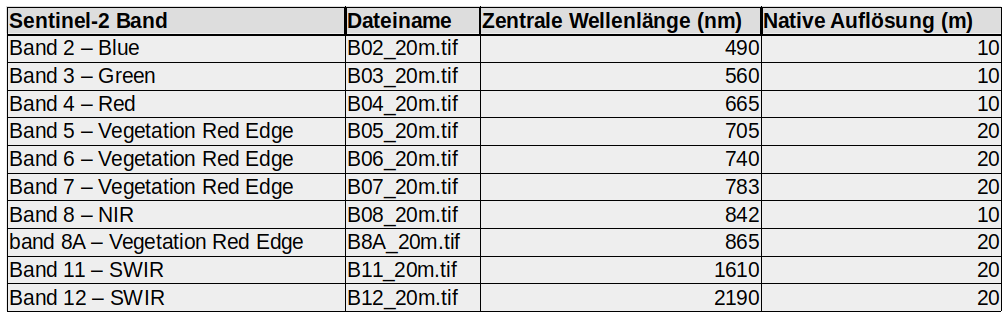

### Betrachten der Ausgangsbilder
Sie können die gewählten Aufnahmen zur Kontrolle betrachten. Der folgende Code visualisiert das in der Variable img_b1 gespeicherte Array. Sie können diese Variable (in Zeile 3) auf img_b2 anpassen, wennn Sie das zweite Bild betrachten möchten.

Die Bilder werden in einer Abstufung grauer Farben dargestellt. Dabei stehen helle Stellen für eine hohe und dunkle Stellen für eine niedrige Reflexion in der inspizierten Wellenlänge. Die Parameter "vmin" und "vmax" begrenzen die Farbpalette zwischen Schwarz (<= vmin) und Weiß (>= vmax). Experimentieren Sie mit den Werten!

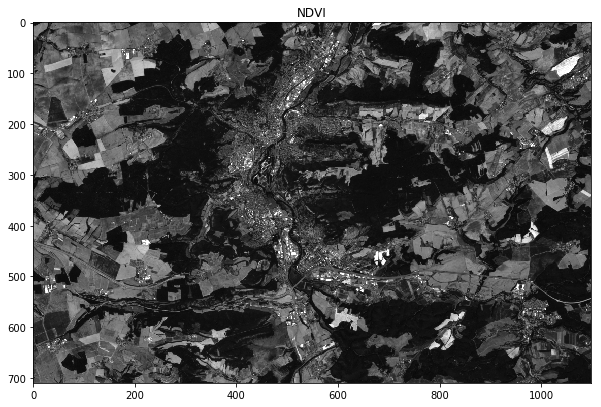

In [10]:
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(img_b1, cmap='gray', vmin=0, vmax=3000)
plt.show()

### Berechnung des NDVI
Sie können den NDVI nun mit der folgenden Formel errechnen. Ihr Ergebnis hängt von den Dateien ab, die sie zu Beginn als Band 1 (NIR) und 2 (RED) geöffnet haben.

In [55]:
ndvi = (img_b1 - img_b2) / (img_b1 + img_b2)

### Betrachten des NDVI
Sie können ihr Ergebnis mit dem folgenden Code visualisieren. Der NDVI nimmt Werte zwischen -1 und +1 ein. Geringe Werte (hier: Rot und Gelb) lassen auf Gebiete mit keiner/wenig Vegetation schließen, während hohe Werte (hier: Grün) auf eine dichte Pflanzenbedeckung hinweisen.

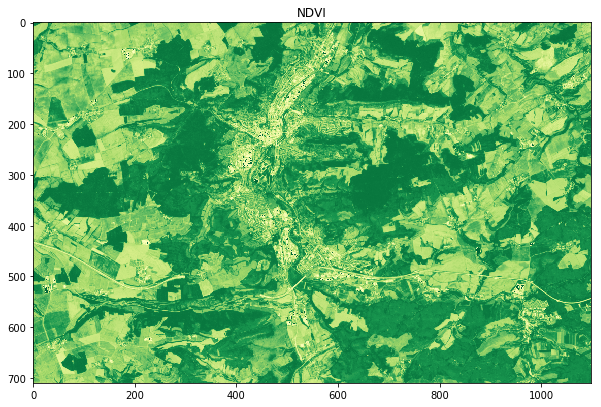

In [56]:
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('NDVI')
plt.show()

In [52]:
# register all of the GDAL drivers
gdal.AllRegister()

rows = band1.RasterYSize
cols = band1.RasterXSize


# create the output image
driver = band1.GetDriver()
#print(driver)
outDs = driver.Create("ndvi.tif", cols, rows, 1, GDT_Float32)
if outDs is None:
    print ('Could not create reclass_40.tif')
    sys.exit(1)
    
outBand = outDs.GetRasterBand(1)
outData = np.zeros((rows,cols), np.float32)

for i in range(0, rows):
    for j in range(0, cols):
        outData[i,j] = ndvi[i,j]

# write the data
outBand.WriteArray(outData)

# flush data to disk, set the NoData value and calculate stats
outBand.FlushCache()
outBand.SetNoDataValue(-99)

# georeference the image and set the projection
outDs.SetGeoTransform(band1.GetGeoTransform())
outDs.SetProjection(band1.GetProjection())

print(band1.GetGeoTransform())
print(band1.GetProjection())

del outData

(672480.0, 20.0, 0.0, 5649440.0, 0.0, -20.0)
PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]


In [57]:
dst_filename = 'ndvineu.tif'


# You need to get those values like you did.
x_pixels = 1099  # number of pixels in x
y_pixels = 710  # number of pixels in y
PIXEL_SIZE = 20  # size of the pixel...        
x_min = 672480
y_max = 5649440  # x_min & y_max are like the "top left" corner.
wkt_projection = band1.GetProjection()

driver = gdal.GetDriverByName('GTiff')

dataset = driver.Create(
    dst_filename,
    x_pixels,
    y_pixels,
    1,
    gdal.GDT_Float32)

dataset.SetGeoTransform((
    x_min,    # 0
    PIXEL_SIZE,  # 1
    0,                      # 2
    y_max,    # 3
    0,                      # 4
    -PIXEL_SIZE))  

dataset.SetProjection(wkt_projection)
dataset.GetRasterBand(1).WriteArray(ndvi)
dataset.FlushCache()  # Write to disk.